## Diabetes prediction

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome(Diabetes): Class variable (0 or 1)

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
diabetes=pd.read_csv('Diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# information about data
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data visualization 

In [164]:
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [165]:
diabetes.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

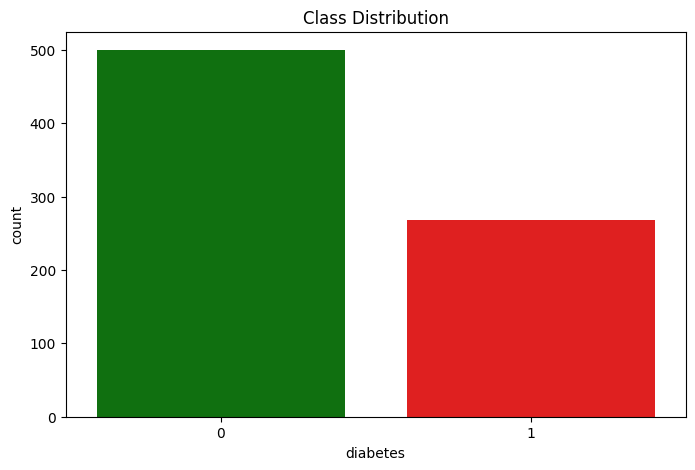

diabetes
0    500
1    268
Name: count, dtype: int64

In [172]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes', data=diabetes, palette=['g', 'r'])
plt.title("Class Distribution")
plt.show()
diabetes['diabetes'].value_counts()

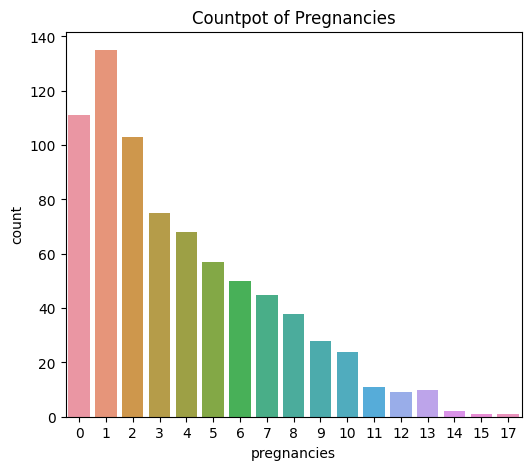

In [175]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='pregnancies', data=diabetes)
plt.title("Countpot of Pregnancies")
plt.show()

In [22]:
def min_max_values(df):
    
    for i in df.columns:

        print(i,":",df[i].min(),"-",df[i].max())

min_max_values(diabetes)

pregnancies : 0 - 17
glucose : 0 - 199
diastolic : 0 - 122
triceps : 0 - 99
insulin : 0 - 846
bmi : 0.0 - 67.1
dpf : 0.078 - 2.42
age : 21 - 81
diabetes : 0 - 1


## Exploratory data analysis

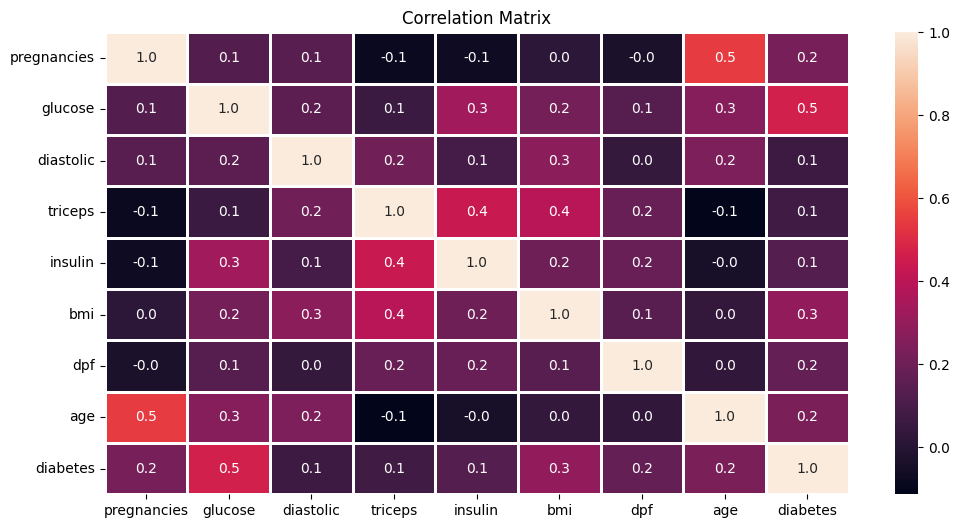

In [168]:
# Correlation 
plt.figure(figsize=(12, 6))
sns.heatmap(diabetes.corr(), annot=True, fmt='0.1f', linewidth=1)
plt.title("Correlation Matrix")
plt.show()

In [24]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
# check for unique values
diabetes.nunique()

pregnancies     17
glucose        136
diastolic       47
triceps         51
insulin        186
bmi            248
dpf            517
age             52
diabetes         2
dtype: int64

In [ ]:
# check for missing values
diabetes.isna().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [176]:
#defining target and features
y=diabetes['diabetes']
x=diabetes.drop(['diabetes'],axis=1)



In [179]:
# Handling imbalance dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)

In [180]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_resampled, y_resampled,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid=train_test_split(x_train,y_train,test_size=0.3)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((490, 8), (210, 8), (490,), (210,))

## Scaling

In [182]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_valid=ss.transform(x_valid)
X_test=ss.transform(x_test)

# Model Training 

## Logistics Regression

In [183]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty="l2", C=0.05, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.05, solver='liblinear')

In [184]:
LR.coef_

array([[ 0.36794347,  0.90186433, -0.13726024, -0.08940752, -0.07411566,
         0.46082915,  0.19568001,  0.10557598]])

In [185]:
LR.intercept_

array([0.02247423])

In [186]:
LR.score(X_train,y_train)

0.7510204081632653

## Validation

In [187]:
y_pred=LR.predict(X_valid)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

## Model Evaluation

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [189]:
# accuracy score
print("The Validation accuracy of the model is:", accuracy_score(y_pred,y_valid))

The Validation accuracy of the model is: 0.7476190476190476


Text(0.5, 1.0, 'confusion matrix')

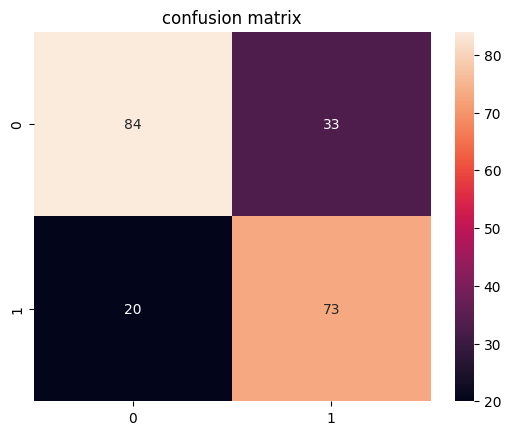

In [190]:
sns.heatmap(confusion_matrix(y_pred,y_valid),annot=True)
plt.title("confusion matrix")

In [191]:
print(classification_report(y_pred,y_valid))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       117
           1       0.69      0.78      0.73        93

    accuracy                           0.75       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.75      0.75      0.75       210



## Testing the Model

In [192]:
# random forest
print(LR.predict(X_test))

[1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0]


In [193]:
print("The Accuracy of the model in testing:",accuracy_score(LR.predict(X_test),y_test))

The Accuracy of the model in testing: 0.73


In [197]:
#pickle the model
import pickle
filename="Diabetes-prediction-ML-model.pkl"
pickle.dump(LR, open(filename, 'wb'))

In [198]:
# pickle the scaler
pickle.dump(ss,open('scaler.pkl','wb'))